In [198]:
from entire_pipeline import*
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib.ticker as ticker
import random
from matplotlib.colors import ListedColormap
import tikzplotlib


In [47]:
# load the dataset
df = pd.read_pickle('./Data_Generation/df_pickle/final_02450_emb.pkl')
# load the embeddings
# make the df only contain the unique contexts
df = df.drop_duplicates(subset=['context'])
context_embeddings = np.stack(df['context_embedding'].to_numpy())


def get_indices(query: str, method: str = 'cs', n_contexts: int = 5):
    """
    This function is the pipeline for the entire project. It takes in a query and finds the most relevant document.
    and gives it to the OpenAI API to generate a answer
    :param n_contexts: The number of contexts to return
    :param semantic_search_model: The semantic search model to use
    :param query: The query to search for
    :return:
    """
    # 1. Preprocess the query
    embedding = get_text_embedding(query)


    # Concatonate the query embedding ontop of each element in the context_embeddings, so each row is the query embedding and the context embedding
    model_input = np.concatenate((np.tile(embedding, (len(context_embeddings), 1)), context_embeddings),
                                 axis=1)


    if method == 'ann':
        with open('ANN_resamp.json', 'r') as json_file:
            loaded_model_json = json_file.read()
        json_file.close()
        loaded_model = model_from_json(loaded_model_json)
        # load weights into new model
        loaded_model.load_weights("ANN/ANN_resamp.h5")
        print("Loaded model from disk")

        # Predict the most relevant context
        prediction = loaded_model.predict(model_input)
        # Get the 2 most relevant contexts
        index = np.argsort(prediction, axis=0)[-n_contexts:]


    elif method == 'cs':
        # Should simply be the cosine similarity
        x = np.array(embedding)
        y = context_embeddings
        cos_sim = np.dot(x, y.T) / (np.linalg.norm(x) * np.linalg.norm(y, axis=1))
        # Get the 2 most relevant contexts
        index = np.argsort(cos_sim, axis=0)[-n_contexts:]

    return index


In [183]:
questions = [
    "What is the purpose of regularization in machine learning?",
    "What is the difference between supervised and unsupervised learning?",
    "What are the key steps in building a machine learning model?"
    "What is the role of feature engineering in machine learning?",
    "What is the concept of overfitting in machine learning?",
    "How does gradient descent work in training a neural network?",
   # "What is the trade-off between bias and variance in machine learning?",
   # "What is the purpose of cross-validation in machine learning?",
   # "What are some common evaluation metrics used in machine learning?",
   # "How can you handle missing data in a machine learning dataset?"
]

In [115]:
top_paragraph_indices = [get_indices(question) for question in questions]

In [49]:
print(len(context_embeddings))

671


C:\Users\farim\AppData\Local\Temp\ipykernel_1632\840345781.py:36: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(plt.cm.ScalarMappable(cmap='jet'), ticks=[0, num_paragraphs-1])


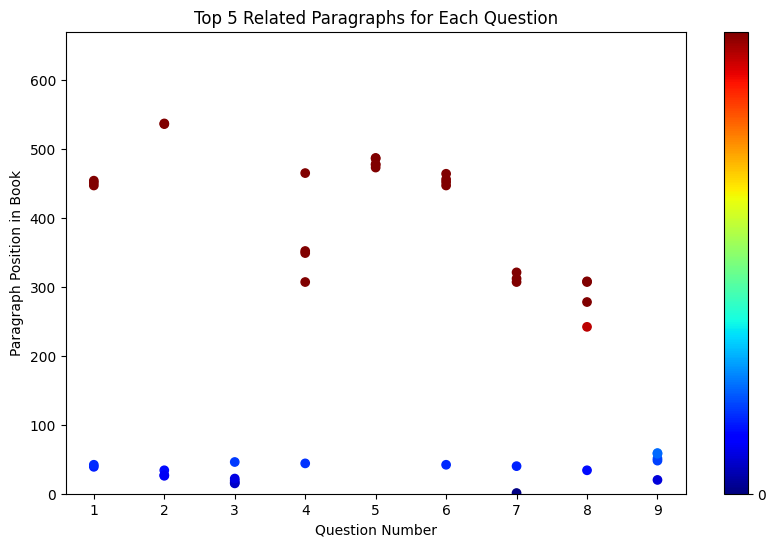

In [106]:
#Plot with coloring the book
# genrating random data
"""
num_questions = 10
num_top_paragraphs = 5
num_paragraphs = len(context_embeddings)

top_paragraph_indices = []
for _ in range(num_questions):
    indices = random.sample(range(num_paragraphs), num_top_paragraphs)
    top_paragraph_indices.append(indices)

#top_paragraph_indices = [get_indices(question) for question in questions]
"""
#data from pipeline
top_paragraph_indices = [get_indices(question) for question in questions]


question_numbers = range(1, len(top_paragraph_indices) + 1)  # Example: [1, 2, 3, ..., 40]

# Creating a color spectrum for the y-axis
num_paragraphs = len(context_embeddings)
color_spectrum = np.arange(num_paragraphs)  # Create an array from 0 to 599

# Plotting the data
plt.figure(figsize=(10, 6))  # Adjust the figure size as per your preference
for i in range(len(question_numbers)):
    x = question_numbers[i]
    y = [color_spectrum[index] for index in top_paragraph_indices[i]]
    color = cm.jet(y)  # Assign colors based on y-values using the 'jet' colormap
    plt.scatter([x] * 5, y, color=color, marker='o')

plt.xlabel('Question Number')
plt.ylabel('Paragraph Position in Book')
plt.title('Top 5 Related Paragraphs for Each Question')
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap='jet'), ticks=[0, num_paragraphs-1])
cbar.ax.set_yticklabels([str(0), str(num_paragraphs-1)])  # Set custom tick labels
plt.ylim(0, num_paragraphs-1)  # Set the y-axis limits

# Set integer ticks on the x-axis
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.show()


In [137]:
#data from pipeline
top_paragraph_indices = [get_indices(question,method="cs") for question in questions]


In [120]:
print((num_top_paragraphs))

5


C:\Users\farim\AppData\Local\Temp\ipykernel_1632\1890955771.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = cm.get_cmap('Blues', num_top_paragraphs)
C:\Users\farim\AppData\Local\Temp\ipykernel_1632\1890955771.py:46: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, ticks=cbar_ticks)


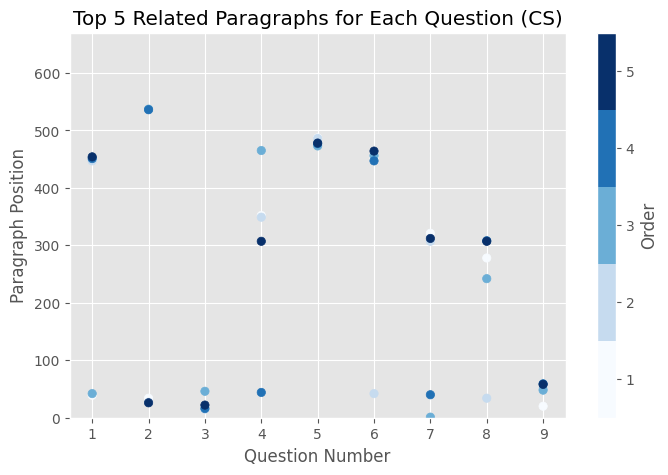

In [138]:
#Plot with color corresponding to order context was picked

num_paragraphs = len(context_embeddings)

# genrating random data
"""
num_questions = 10
num_top_paragraphs = 5


top_paragraph_indices = []
for _ in range(num_questions):
    indices = random.sample(range(num_paragraphs), num_top_paragraphs)
    top_paragraph_indices.append(indices)

#top_paragraph_indices = [get_indices(question) for question in questions]
"""
question_numbers = range(1, len(top_paragraph_indices) + 1)

# Creating shades of red for the colors
color_palette = cm.get_cmap('Blues', num_top_paragraphs)

# Plotting the data
plt.figure(figsize=(8, 5))  # Adjust the figure size as per your preference
plt.style.use('ggplot')
for i in range(len(question_numbers)):
    x = question_numbers[i]
    y = [j for j in range(num_top_paragraphs)]
    color = color_palette(y)  # Assign shades of red based on y-values using the 'Reds' colormap
    plt.scatter([x] * num_top_paragraphs, top_paragraph_indices[i], color=color, marker='o')

plt.xlabel('Question Number')
plt.ylabel('Paragraph Position')
plt.title('Top 5 Related Paragraphs for Each Question (CS)')

# Create a custom colormap with the same colors as on the plot
custom_cmap = ListedColormap(color)

# Calculate the colorbar tick positions and labels based on the color spectrum
cbar_ticks = np.linspace(0.5 / num_top_paragraphs, 1 - 0.5 / num_top_paragraphs, num_top_paragraphs)
cbar_labels = np.arange(1, num_top_paragraphs + 1)

# Plot the colorbar with only the used colors
sm = cm.ScalarMappable(cmap=custom_cmap)
sm.set_array([])
cbar = plt.colorbar(sm, ticks=cbar_ticks)
cbar.set_label('Order')
cbar.ax.set_yticklabels(cbar_labels)  # Set custom tick labels

plt.ylim(0, num_paragraphs - 1)  # Set the y-axis limits

# Set integer ticks on the x-axis
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.show()


C:\Users\farim\AppData\Local\Temp\ipykernel_1632\2546805425.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = cm.get_cmap('Reds', num_top_paragraphs)
C:\Users\farim\AppData\Local\Temp\ipykernel_1632\2546805425.py:44: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, ticks=cbar_ticks)


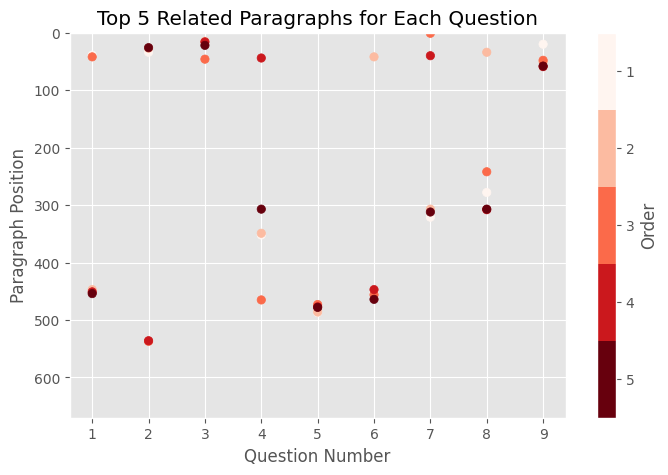

In [201]:

num_paragraphs = len(context_embeddings)
# genrating random data
"""
num_questions = 10
num_top_paragraphs = 5


top_paragraph_indices = []
for _ in range(num_questions):
    indices = random.sample(range(num_paragraphs), num_top_paragraphs)
    top_paragraph_indices.append(indices)

#top_paragraph_indices = [get_indices(question) for question in questions]
"""

question_numbers = range(1, len(top_paragraph_indices) + 1)  # Example: [1, 2, 3, ..., 40]

# Creating shades of red for the colors
color_palette = cm.get_cmap('Reds', num_top_paragraphs)

# Plotting the data
plt.figure(figsize=(8, 5), facecolor='white')  # Set the facecolor parameter to 'white'
plt.style.use('ggplot')
for i in range(len(question_numbers)):
    x = question_numbers[i]
    y = [j for j in range(num_top_paragraphs)]
    color = color_palette(y)  # Assign shades of red based on y-values using the 'Reds' colormap
    plt.scatter([x] * num_top_paragraphs, top_paragraph_indices[i], color=color, marker='o')

plt.xlabel('Question Number')
plt.ylabel('Paragraph Position')
plt.title('Top 5 Related Paragraphs for Each Question')

# Create a custom colormap with the same colors as on the plot and reverse it
custom_cmap = ListedColormap(color[::-1])

# Calculate the colorbar tick positions and labels based on the color spectrum
cbar_ticks = np.linspace(0.5 / num_top_paragraphs, 1 - 0.5 / num_top_paragraphs, num_top_paragraphs)
cbar_labels = np.arange(1, num_top_paragraphs + 1)

# Plot the colorbar with only the used colors and reverse it
sm = cm.ScalarMappable(cmap=custom_cmap)
sm.set_array([])
cbar = plt.colorbar(sm, ticks=cbar_ticks)
cbar.set_label('Order')
cbar.ax.set_yticklabels(cbar_labels[::-1])  # Set custom tick labels and reverse them

plt.ylim(num_paragraphs - 1, 0)  # Flip the y-axis limits

# Set integer ticks on the x-axis
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.show()


In [184]:
#Creating indices for top 5 paragraphs us9ing the to methods
num_top_paragraphs = 5

top_paragraph_indices_1 =  [get_indices(question,method="cs",n_contexts=num_top_paragraphs) for question in questions]
top_paragraph_indices_2 =  [get_indices(question,method="ann",n_contexts=num_top_paragraphs) for question in questions]



Loaded model from disk
21/21 [==============================] - 0s 2ms/step
Loaded model from disk
21/21 [==============================] - 0s 2ms/step
Loaded model from disk
21/21 [==============================] - 0s 3ms/step
Loaded model from disk
21/21 [==============================] - 0s 3ms/step
Loaded model from disk
21/21 [==============================] - 0s 5ms/step


In [ ]:
# Transform to tikz code


C:\Users\farim\AppData\Local\Temp\ipykernel_1632\2296954100.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette_1 = cm.get_cmap('Reds', num_top_paragraphs)
C:\Users\farim\AppData\Local\Temp\ipykernel_1632\2296954100.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette_2 = cm.get_cmap('Blues', num_top_paragraphs)
C:\Users\farim\AppData\Local\Temp\ipykernel_1632\2296954100.py:67: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from 

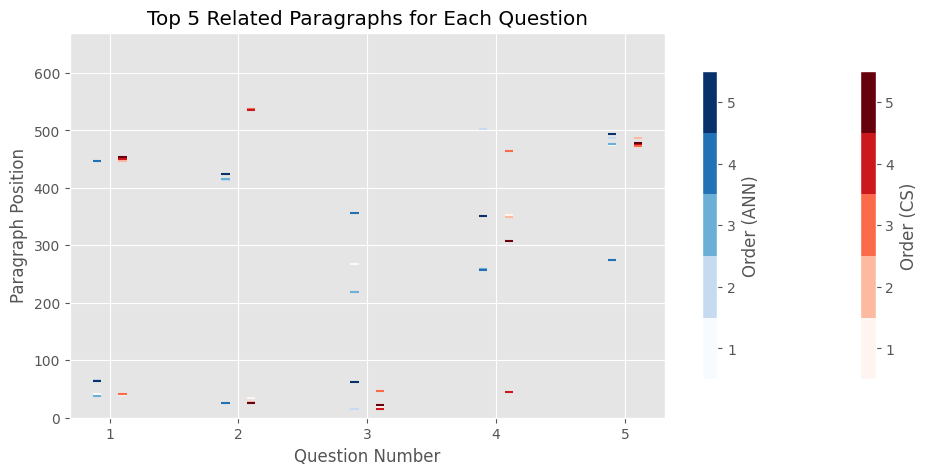

In [202]:
#Both plots combined
"""
# Generating random top paragraph indices for each question for the first dataset
num_questions = 5
num_top_paragraphs = 5
num_paragraphs = 600

top_paragraph_indices_1 = []
for _ in range(num_questions):
    indices = random.sample(range(num_paragraphs), num_top_paragraphs)
    top_paragraph_indices_1.append(indices)

# Generating random top paragraph indices for each question for the second dataset
top_paragraph_indices_2 = []
for _ in range(num_questions):
    indices = random.sample(range(num_paragraphs), num_top_paragraphs)
    top_paragraph_indices_2.append(indices)

"""




question_numbers = range(1, len(top_paragraph_indices_1) + 1)  # Example: [1, 2, 3, ..., 40]

# Creating shades of red for the first dataset
color_palette_1 = cm.get_cmap('Reds', num_top_paragraphs)

# Creating shades of blue for the second dataset
color_palette_2 = cm.get_cmap('Blues', num_top_paragraphs)

# Plotting the data
fig, ax = plt.subplots(figsize=(12, 5))  # Adjust the figure size as per your preference
plt.style.use('ggplot')


# Plotting the first dataset
for i in range(len(question_numbers)):
    x = question_numbers[i]+0.1
    y = [j for j in range(num_top_paragraphs)]
    color1 = color_palette_1(y)  # Assign shades of red based on y-values using the 'Reds' colormap
    plt.scatter([x] * num_top_paragraphs, top_paragraph_indices_1[i], color=color1, marker='_')

# Plotting the second dataset
for i in range(len(question_numbers)):
    x = question_numbers[i]-0.1
    y = [j for j in range(num_top_paragraphs)]
    color2 = color_palette_2(y)  # Assign shades of blue based on y-values using the 'Blues' colormap
    plt.scatter([x] * num_top_paragraphs, top_paragraph_indices_2[i], color=color2, marker='_')

plt.xlabel('Question Number')
plt.ylabel('Paragraph Position')
plt.title('Top 5 Related Paragraphs for Each Question')

# Create a custom colormap with the same colors as on the plot
custom_cmap_1 = ListedColormap(color1)
custom_cmap_2 = ListedColormap(color2)

# Calculate the colorbar tick positions and labels based on the color spectrum
cbar_ticks = np.linspace(0.5 / num_top_paragraphs, 1 - 0.5 / num_top_paragraphs, num_top_paragraphs)
cbar_labels = np.arange(1, num_top_paragraphs + 1)


# Plot the colorbar with only the used colors
sm_1 = cm.ScalarMappable(cmap=custom_cmap_1)
sm_1.set_array([])
cbar_1 = plt.colorbar(sm_1, ticks=cbar_ticks,pad=0.05,shrink=0.8,location="right")
cbar_1.set_label('Order (CS)')
cbar_1.ax.set_yticklabels(cbar_labels)  # Set custom tick labels

# Add a second colorbar for the second dataset
sm_2 = cm.ScalarMappable(cmap=custom_cmap_2)
sm_2.set_array([])
cbar_2 = plt.colorbar(sm_2, ticks=cbar_ticks, pad=0.05, shrink=0.8,location="right")
cbar_2.set_label('Order (ANN)')
cbar_2.ax.set_yticklabels(cbar_labels)  # Set custom tick labels




# Set the y-axis limits
plt.ylim(0, num_paragraphs - 1)

# Set integer ticks on the x-axis
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

tikzplotlib.clean_figure()
tikzplotlib.save("./Documents/context_plot.tex")

import matplotlib as mpl
plt.show()
plt.close()
mpl.rcParams.update(mpl.rcParamsDefault)